https://mp.weixin.qq.com/s/HrT_NsRGa0czcboP6-4eLA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

from sklearn import datasets

from sklearn.model_selection import train_test_split

In [2]:
df = datasets.fetch_california_housing()

In [3]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X = pd.DataFrame(df.data,columns = df.feature_names)
y = pd.DataFrame(df.target,columns = df.target_names)

In [5]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 然后将训练集进一步划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 x 0.8 = 0.1


In [6]:
# 数据集标准化
x_mean = X_train.mean()
x_std =  X_train.std()
y_mean = y.mean()
y_std = y.std()
X_train = (X_train - x_mean)/x_std
y_train = (y_train-y_mean)/y_std
X_val = (X_val - x_mean)/x_std
y_val = (y_val - y_mean)/y_std
X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

对加利福尼亚房价数据集进行处理，首先将数据集分割为训练集、验证集和测试集，然后对特征和目标变量进行标准化，以确保不同特征在同一尺度上进行模型训练和评估

# 模型参数定义

# LightGBM模型参数

In [7]:
from ngboost import NGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb

In [8]:
# LightGBM模型参数
params_lgb = {
    'learning_rate': 0.02,       # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1
    'boosting_type': 'gbdt',     # 提升方法，这里使用梯度提升树（Gradient Boosting Decision Tree，简称GBDT）
    'objective': 'mse',          # 损失函数，这里使用均方误差（Mean Squared Error，简称MSE）
    'metric': 'rmse',            # 评估指标，这里使用均方根误差（Root Mean Squared Error，简称RMSE）
    'num_leaves': 127,           # 每棵树的叶子节点数量，控制模型复杂度。较大值可以提高模型复杂度但可能导致过拟合
    'verbose': -1,               # 控制 LightGBM 输出信息的详细程度，-1表示无输出，0表示最少输出，正数表示输出更多信息
    'seed': 42,                  # 随机种子，用于重现模型的结果
    'n_jobs': -1,                # 并行运算的线程数量，-1表示使用所有可用的CPU核心
    'feature_fraction': 0.8,     # 每棵树随机选择的特征比例，用于增加模型的泛化能力
    'bagging_fraction': 0.9,     # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力
    'bagging_freq': 4            # 每隔多少次迭代进行一次bagging操作，用于增加模型的泛化能力
}
model_lgb = lgb.LGBMRegressor(**params_lgb)

# XGBoost模型参数

In [9]:
# XGBoost模型参数
params_xgb = {
    'learning_rate': 0.02,            # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1
    'booster': 'gbtree',              # 提升方法，这里使用梯度提升树（Gradient Boosting Tree）
    'objective': 'reg:squarederror',  # 损失函数，这里使用平方误差
    'max_leaves': 127,                # 每棵树的叶子节点数量，控制模型复杂度。较大值可以提高模型复杂度但可能导致过拟合
    'verbosity': 1,                   # 控制 XGBoost 输出信息的详细程度，0表示无输出，1表示输出进度信息
    'seed': 42,                       # 随机种子，用于重现模型的结果
    'nthread': -1,                    # 并行运算的线程数量，-1表示使用所有可用的CPU核心
    'colsample_bytree': 0.6,          # 每棵树随机选择的特征比例，用于增加模型的泛化能力
    'subsample': 0.7,                 # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力
    'early_stopping_rounds': 100,     # 早停轮数，在验证集上性能不提升时提前停止训练
    'eval_metric': 'rmse'             # 评估指标，这里使用均方根误差（Root Mean Squared Error，简称RMSE）
}
model_xgb = xgb.XGBRegressor(**params_xgb)

# CatBoost模型参数

In [10]:

# CatBoost模型参数
params_cat = {
    'learning_rate': 0.02,       # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1
    'iterations': 1000,          # 弱学习器（决策树）的数量
    'depth': 6,                  # 决策树的深度，控制模型复杂度
    'eval_metric': 'RMSE',       # 评估指标，这里使用均方根误差（Root Mean Squared Error，简称RMSE）
    'random_seed': 42,           # 随机种子，用于重现模型的结果
    'verbose': 100               # 控制CatBoost输出信息的详细程度，每100次迭代输出一次
}
model_cat = CatBoostRegressor(**params_cat)


# NGBoost模型参数

In [11]:
# NGBoost模型参数
params_ngb = {
    'learning_rate': 0.02,       # 学习率，控制每一步的步长，用于防止过拟合
    'n_estimators': 1000,        # 弱学习器（决策树）的数量
    'verbose': False,            # 控制NGBoost输出信息的详细程度
    'random_state': 42,          # 随机种子，用于重现模型的结果
    'natural_gradient': True     # 是否使用自然梯度来更新模型参数
}
model_ngb = NGBRegressor(**params_ngb)

# 模型训练

In [12]:
# 定义平均模型
class AverageModel:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y, X_val, y_val):
        for model in self.models:
            if isinstance(model, lgb.LGBMRegressor):
                model.fit(X, y, eval_set=[(X_val, y_val)], eval_metric='rmse', callbacks=[lgb.early_stopping(stopping_rounds=100)])
            elif isinstance(model, xgb.XGBRegressor):
                model.fit(X, y, eval_set=[(X_val, y_val)], verbose=False)
            elif isinstance(model, CatBoostRegressor):
                model.fit(X, y, eval_set=(X_val, y_val), use_best_model=True, verbose=False)
            elif isinstance(model, NGBRegressor):
                model.fit(X, y, X_val=X_val, Y_val=y_val)
    
    def predict(self, X):
        predictions = []
        for model in self.models:
            predictions.append(model.predict(X))
        return sum(predictions) / len(predictions)

# 创建平均模型
average_model_four = AverageModel([model_lgb, model_xgb, model_cat, model_ngb])

# 训练模型
average_model_four.fit(X_train, y_train, X_val, y_val)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.457978


D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


定义了一个名为 AverageModel 的类，用于创建一个平均模型，通过集成四个模型的预测结果来提升预测的稳定性和准确性，在 fit 方法中，该类可以同时训练传入的多个模型，并使用验证集进行早期停止策略来防止过拟合，在 predict 方法中，该类将多个模型的预测结果取平均作为最终的预测输出

# 模型预测及评价

In [16]:
from sklearn import metrics

In [17]:
# 预测
y_pred_four = average_model_four.predict(X_test)

y_pred_list = y_pred_four.tolist()  
mse = metrics.mean_squared_error(y_test, y_pred_list)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred_list)
r2 = metrics.r2_score(y_test, y_pred_list)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("拟合优度 (R-squared):", r2)

均方误差 (MSE): 0.19401153013351646
均方根误差 (RMSE): 0.44046739962625664
平均绝对误差 (MAE): 0.30454036850287036
拟合优度 (R-squared): 0.8028488568459582


In [18]:
# 定义平均模型
class AverageModel:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y, X_val, y_val):
        for model in self.models:
            if isinstance(model, NGBRegressor):
                model.fit(X, y, X_val=X_val, Y_val=y_val)  # NGBoost的fit方法接受验证集参数
            elif isinstance(model, CatBoostRegressor):
                model.fit(X, y, eval_set=(X_val, y_val), use_best_model=True, verbose=False)
    
    def predict(self, X):
        predictions = []
        for model in self.models:
            predictions.append(model.predict(X))
        return sum(predictions) / len(predictions)

# 创建平均模型
average_model_two = AverageModel([model_ngb, model_cat])

# 训练模型
average_model_two.fit(X_train, y_train, X_val, y_val)

# 预测
y_pred_two = average_model_two.predict(X_test)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn import metrics
import numpy as np
y_pred_list = y_pred_two.tolist()  # 或者 y_pred_array = np.array(y_pred)
mse = metrics.mean_squared_error(y_test, y_pred_list)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred_list)
r2 = metrics.r2_score(y_test, y_pred_list)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("拟合优度 (R-squared):", r2)

均方误差 (MSE): 0.17985577313613024
均方根误差 (RMSE): 0.42409406166100727
平均绝对误差 (MAE): 0.28574670393396295
拟合优度 (R-squared): 0.8172336909448642


由于前文梯度提升集成：LightGBM与XGBoost组合预测定义过常见的LightGBM与XGBoost模型，这里我们再定义并训练了一个只包含NGBoost和CatBoost的平均模型，通过在训练和验证数据集上分别训练这两个模型，再对测试集进行预测，并计算均方误差（MSE）、均方根误差（RMSE）、平均绝对误差（MAE）和拟合优度（R-squared），以评估组合模型的预测性能

可以发现在这个数据集上，NGBoost和CatBoost的平均模型的拟合优度（R-squared）相对于LightGBM、XGBoost、CatBoost和NGBoost的集成模型较好，可能是由于这两个模型在这个数据集上的数据特征提取和预测方面具有更好的互补性和适应性，同时避免了过多模型组合可能带来的复杂度和过拟合问题。当然，读者也可以自行选择不同的模型进行集成，并给不同的模型赋予不同的权重来进一步优化模型性能

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14572\3429618116.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pred_two = y_pred_two * float(y_std) + float(y_mean)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14572\3429618116.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pred_four = y_pred_four * float(y_std) + float(y_mean)


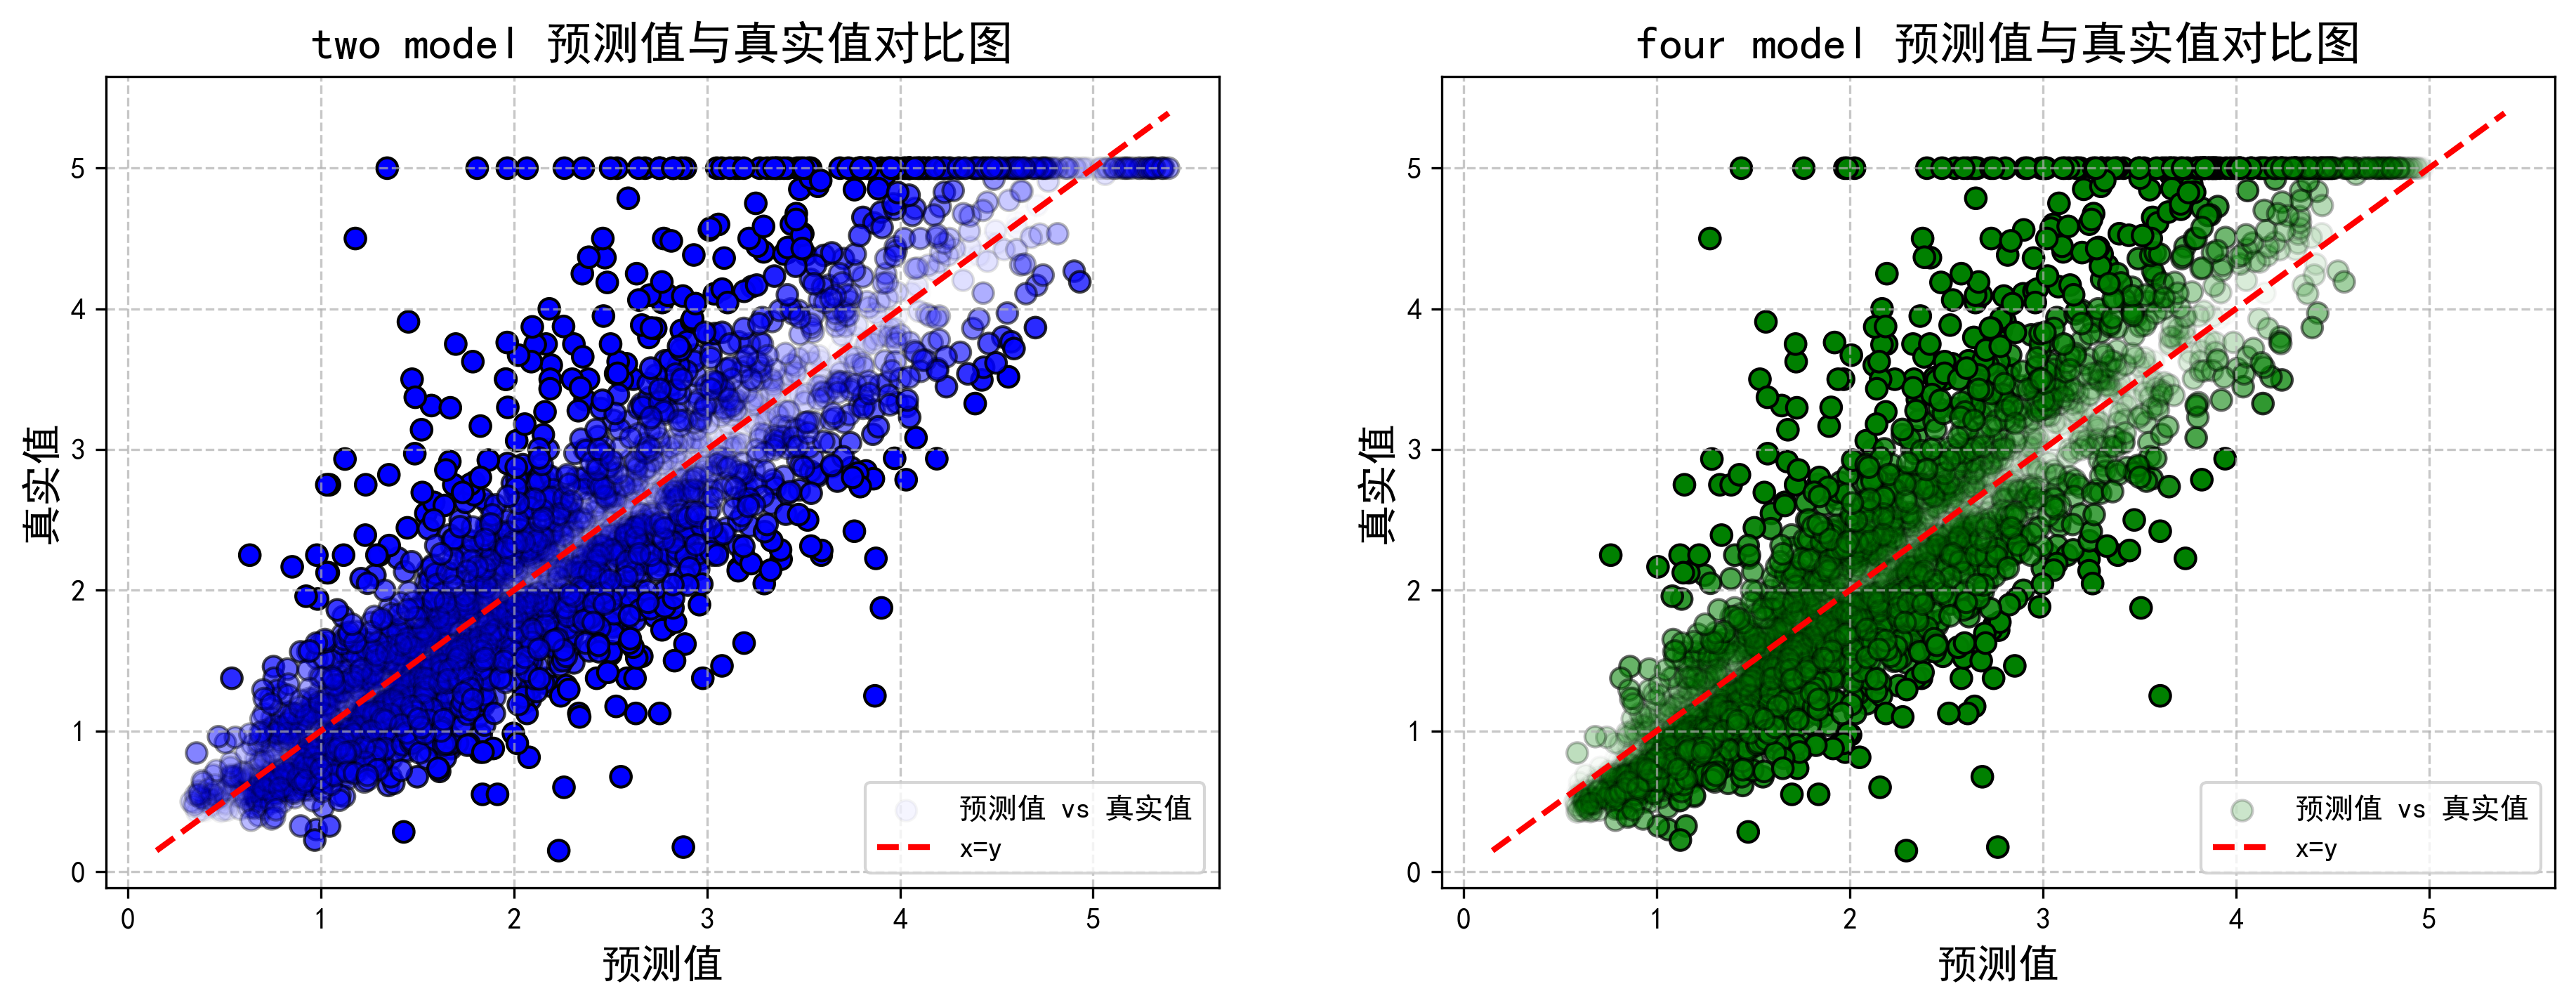

In [39]:

plt.figure(figsize=(15, 5), dpi=300)
plt.subplot(1, 2, 1)
# 反标准化预测值
pred_two = y_pred_two * float(y_std) + float(y_mean)
y_test_rescaled = np.array(y_test * y_std + y_mean)
# 计算预测值与真实值差值的绝对值
alpha_values_two = abs(pred_two - y_test_rescaled.reshape(-1))
# 确保 alpha 值在 0 到 1 之间
alpha_values_two = np.clip(alpha_values_two, 0, 1)
plt.scatter(pred_two, y_test_rescaled, color='blue', edgecolor='k', s=50, alpha=alpha_values_two, label='预测值 vs 真实值')
plt.title('two model 预测值与真实值对比图', fontsize=16)
plt.xlabel('预测值', fontsize=14)
plt.ylabel('真实值', fontsize=14)
max_val_two = max(max(pred_two), max(y_test_rescaled))
min_val_two = min(min(pred_two), min(y_test_rescaled))
plt.plot([min_val_two[0], max_val_two], [min_val_two[0], max_val_two], color='red', linestyle='--', linewidth=2, label='x=y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 2, 2)
pred_four = y_pred_four * float(y_std) + float(y_mean)
alpha_values_four = abs(pred_four - y_test_rescaled.reshape(-1))
alpha_values_four = np.clip(alpha_values_four, 0, 1)
plt.scatter(pred_four, y_test_rescaled, color='green', edgecolor='k', s=50, alpha=alpha_values_four, label='预测值 vs 真实值')
plt.title('four model 预测值与真实值对比图', fontsize=16)
plt.xlabel('预测值', fontsize=14)
plt.ylabel('真实值', fontsize=14)
max_val_four = max(max(pred_four), max(y_test_rescaled))
min_val_four = min(min(pred_four), min(y_test_rescaled))
plt.plot([min_val_two[0], max_val_two], [min_val_two[0], max_val_two], color='red', linestyle='--', linewidth=2, label='x=y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

两幅可视化分别为NGBoost和CatBoost集成模型、LightGBM、XGBoost、CatBoost和NGBoost集成模型的可视化，图中横轴表示模型预测的值，纵轴表示真实的标签值，每个点的透明度（alpha 值）根据预测值与真实值的差异大小动态调整，差异越大的点透明度越低，红色虚线表示理想情况下预测值等于真实值的对角线